## 📊 Building Player Pass Maps in UEFA Women’s Euros 2025 & FIFA Women’s World Cup 2023

**Competitions:** UEFA Women’s Euro 2025 & FIFA Women’s World Cup 2023  
**Purpose:** Create detailed player pass maps showing pass start locations, trajectories, completion status, and expected pass value (xP)  
**Methods:** Event data filtering, match selection, pitch plotting with mplsoccer, arrows and circles for passes, color gradients for xP  
**Author:** [Victoria Friss de Kereki](https://www.linkedin.com/in/victoria-friss-de-kereki/)  
**Medium Article:** *Coming soon – Women’s Football Pass Map Visualisation*  

---

**Notebook first wri1ten:** `22/02/2026`  
**Last updated:** `22/02/2026`  

> This notebook demonstrates how to **build detailed pass maps** for players in UEFA Women’s Euros 2025 and FIFA Women’s World Cup 2023. Using event data and Python libraries such as pandas, matplotlib, and mplsoccer, each map visualises:  
> 
> - **Pass start location** (circle)  
> - **Pass trajectory** (arrow)  
> - **Completion status** (solid vs dashed line)  
> - **Expected pass value (xP)** (color gradient)  
> 
> Position-based color palettes distinguish **goalkeepers, defenders, midfielders, and forwards**, providing a visually clear representation of passing behaviour.  
> 
> The notebook offers a **reproducible workflow** to generate pass maps for multiple players across a tournament, ready for tactical analysis or visual storytelling.

## Step 0: Setup

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import Normalize, LinearSegmentedColormap, to_rgb
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mplsoccer import Pitch

## Step 1: Load datasets

In [2]:
# Folder path for datasets
data_folder = r'Datasets/xP_master/Calibrated passes data'

# Event datasets
euros_all = pd.read_csv(os.path.join(data_folder, 'euros_all.csv'))
player_stats_euros = pd.read_csv(os.path.join(data_folder, 'player_stats_euros.csv'))
worldcup_all = pd.read_csv(os.path.join(data_folder, 'worldcup_all.csv'))
player_stats_worldcup_all = pd.read_csv(os.path.join(data_folder, 'player_stats_worldcup.csv'))

# Matches dataset
matches = pd.read_csv('Datasets/xP_master/matches.csv')

C:\Users\vicky\AppData\Local\Temp\ipykernel_12872\1665114319.py:5: DtypeWarning: Columns (11,43,45,49,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  euros_all = pd.read_csv(os.path.join(data_folder, 'euros_all.csv'))
C:\Users\vicky\AppData\Local\Temp\ipykernel_12872\1665114319.py:7: DtypeWarning: Columns (11,42,43,45,49,50,52,56) have mixed types. Specify dtype option on import or set low_memory=False.
  worldcup_all = pd.read_csv(os.path.join(data_folder, 'worldcup_all.csv'))


## Step 2: Filter matches for Euros 2025 and World Cup 2023

In [3]:
# Filter matches by tournament and season
euros_2025_matches = matches[
    (matches['competition'] == "Europe - UEFA Women's Euro") &
    (matches['season'] == "2025")
]

worldcup_2023_matches = matches[
    (matches['competition'] == "International - Women's World Cup") &
    (matches['season'] == "2023")
]

# Get lists of match IDs
euros_2025_match_ids = euros_2025_matches['match_id'].tolist()
worldcup_2023_match_ids = worldcup_2023_matches['match_id'].tolist()

# Filter event datasets by match IDs
euros_2025 = euros_all[euros_all['match_id'].isin(euros_2025_match_ids)]
player_stats_euros_2025 = player_stats_euros[player_stats_euros['competition_name'] == "Europe - UEFA Women's Euro"]

worldcup_2023 = worldcup_all[worldcup_all['match_id'].isin(worldcup_2023_match_ids)]
player_stats_worldcup_2023 = player_stats_worldcup_all[player_stats_worldcup_all['competition_name'] == "FIFA Women's World Cup"]

print(f"Number of Euros 2025 matches: {len(euros_2025_match_ids)}")
print(f"Number of World Cup 2023 matches: {len(worldcup_2023_match_ids)}")

Number of Euros 2025 matches: 31
Number of World Cup 2023 matches: 64


## Step 3: Draw a Basic Pitch

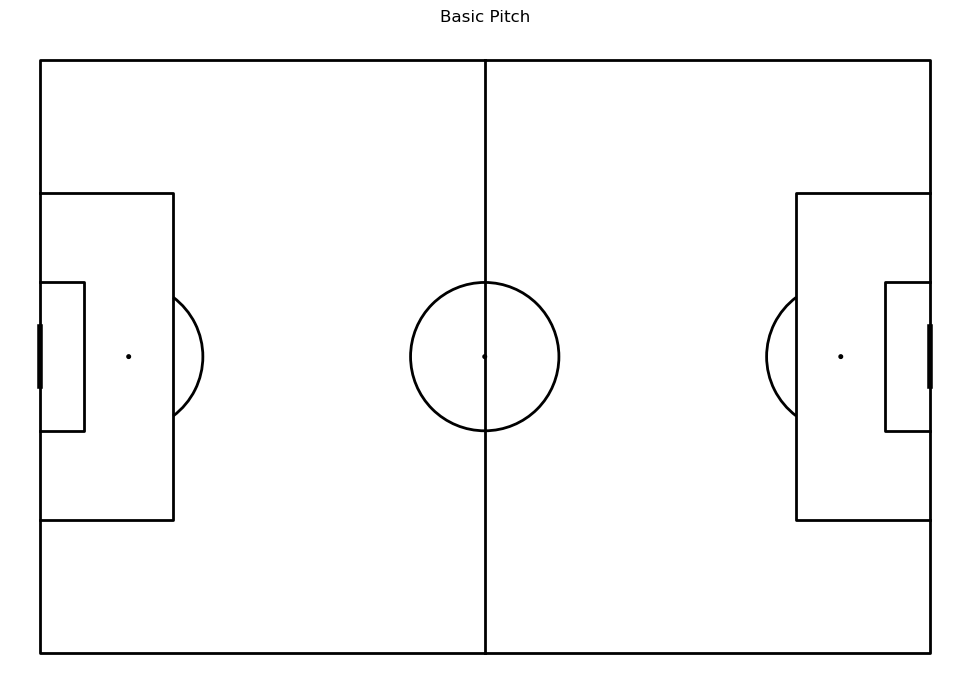

In [4]:
pitch = Pitch(line_color='black')
fig, ax = pitch.draw(figsize=(10, 7))
ax.set_title("Basic Pitch")
plt.show()

## Step 4: Plot Player Passes as Simple Dots

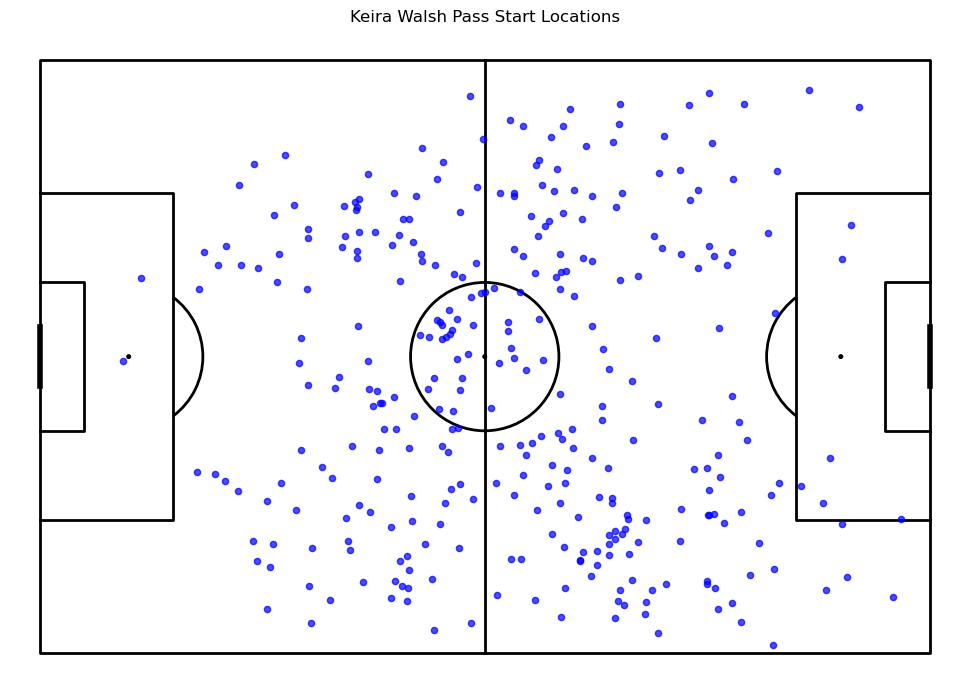

In [5]:
# Example player
player_name = "Keira Walsh"

# Filter player passes
passes = euros_2025[euros_2025['player'] == player_name]

fig, ax = pitch.draw(figsize=(10, 7))
ax.scatter(passes['start_x'], passes['start_y'], s=20, color='blue', alpha=0.7)
ax.set_title(f"{player_name} Pass Start Locations")
plt.show()

## Step 5: Add Arrows for Passes

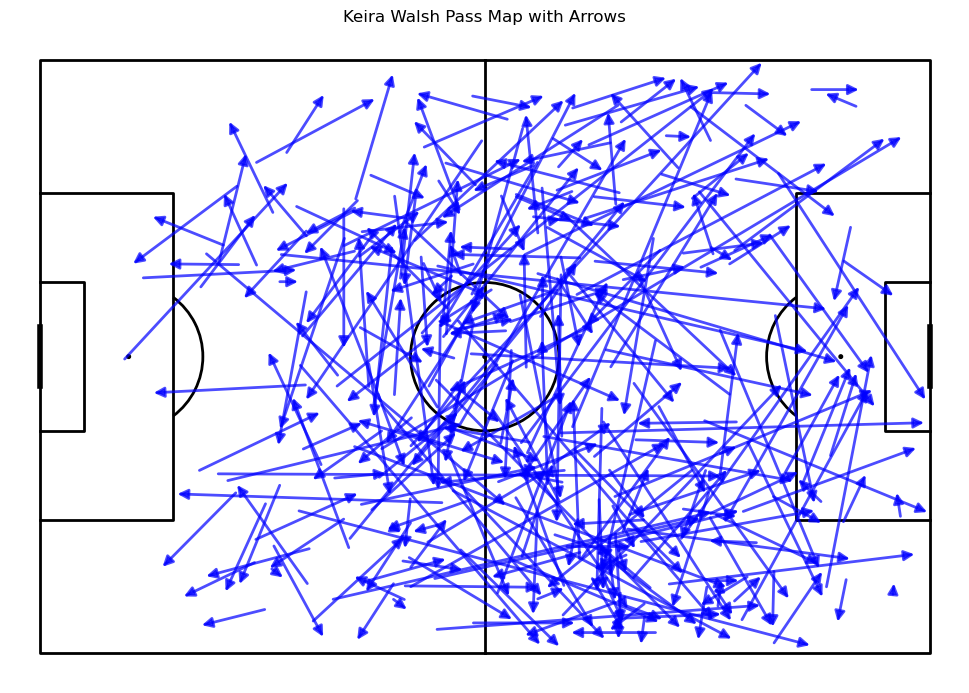

In [6]:
fig, ax = pitch.draw(figsize=(10, 7))

for _, p in passes.iterrows():
    x_start, y_start = p['start_x'], p['start_y']
    x_end, y_end = p['end_x'], p['end_y']
    
    arrow = FancyArrowPatch(
        (x_start, y_start),
        (x_end, y_end),
        color='blue',
        arrowstyle='-|>',
        linewidth=2,
        alpha=0.7,
        mutation_scale=15
    )
    ax.add_patch(arrow)

ax.set_title(f"{player_name} Pass Map with Arrows")
plt.show()

## Step 6: Add Circles at Pass Start

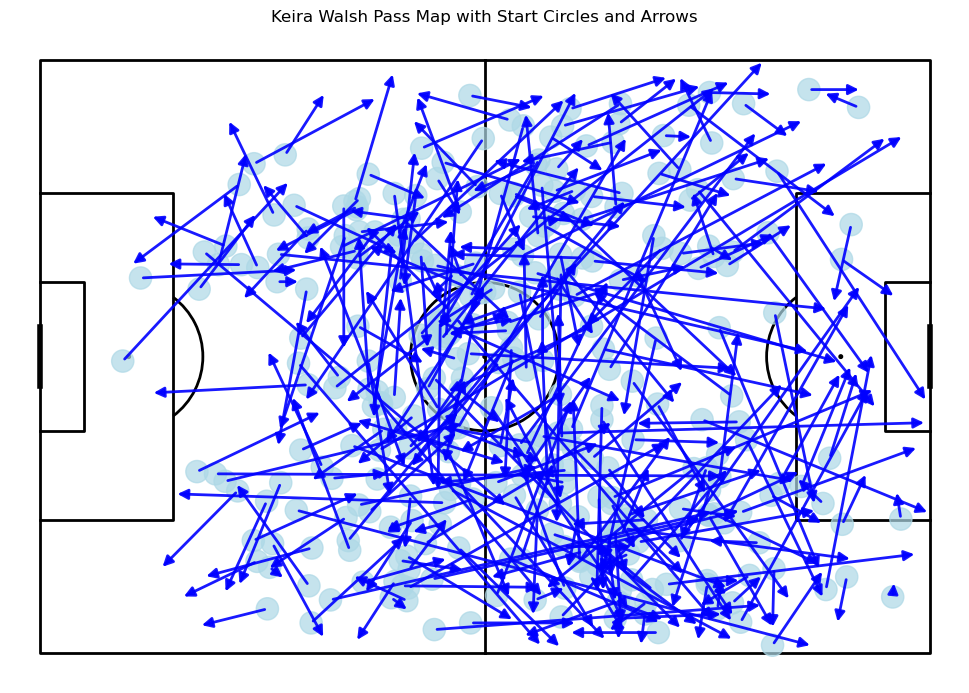

In [7]:
fig, ax = pitch.draw(figsize=(10, 7))

for _, p in passes.iterrows():
    x_start, y_start = p['start_x'], p['start_y']
    x_end, y_end = p['end_x'], p['end_y']
    
    # Circle at start of pass
    ax.add_patch(plt.Circle((x_start, y_start), radius=1.5, color='lightblue', alpha=0.7, zorder=1))
    
    # Arrow
    arrow = FancyArrowPatch((x_start, y_start), (x_end, y_end),
                            color='blue', arrowstyle='-|>', linewidth=2,
                            alpha=0.9, mutation_scale=15, zorder=2)
    ax.add_patch(arrow)

ax.set_title(f"{player_name} Pass Map with Start Circles and Arrows")
plt.show()

## Step 7: Add Completion Status (Solid vs Dashed Arrows)

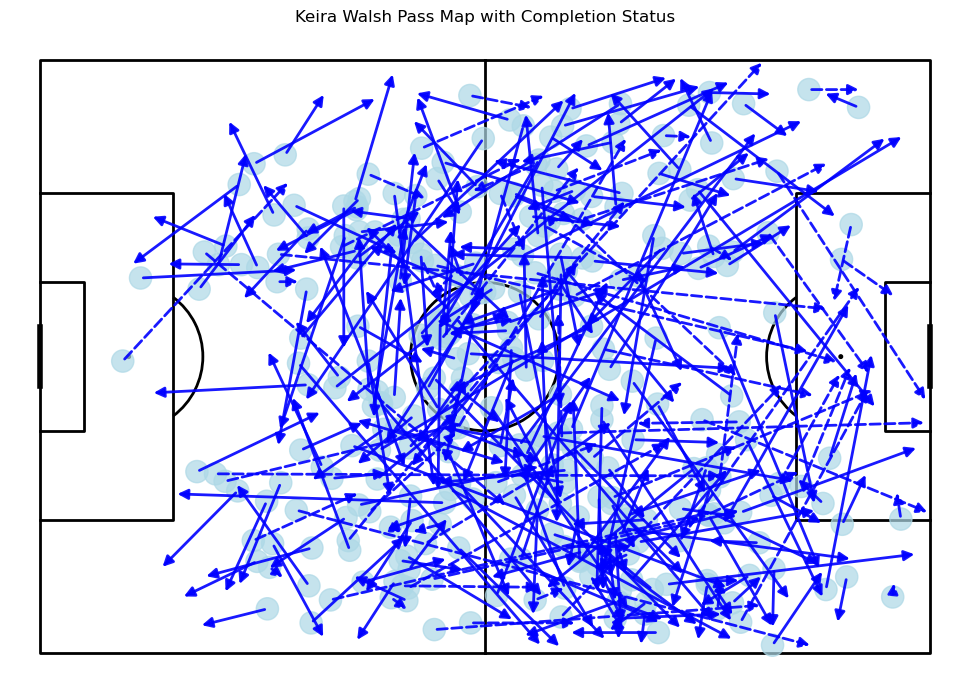

In [8]:
fig, ax = pitch.draw(figsize=(10, 7))

for _, p in passes.iterrows():
    x_start, y_start = p['start_x'], p['start_y']
    x_end, y_end = p['end_x'], p['end_y']
    
    # Circle
    ax.add_patch(plt.Circle((x_start, y_start), radius=1.5, color='lightblue', alpha=0.7, zorder=1))
    
    # Arrow style based on completion
    linestyle = '-' if p['completed'] else '--'
    arrow = FancyArrowPatch((x_start, y_start), (x_end, y_end),
                            color='blue', arrowstyle='-|>', linewidth=2,
                            alpha=0.9, mutation_scale=15, linestyle=linestyle, zorder=2)
    ax.add_patch(arrow)

ax.set_title(f"{player_name} Pass Map with Completion Status")
plt.show()

## Step 8: Color Arrows by Expected Pass Value (xP)

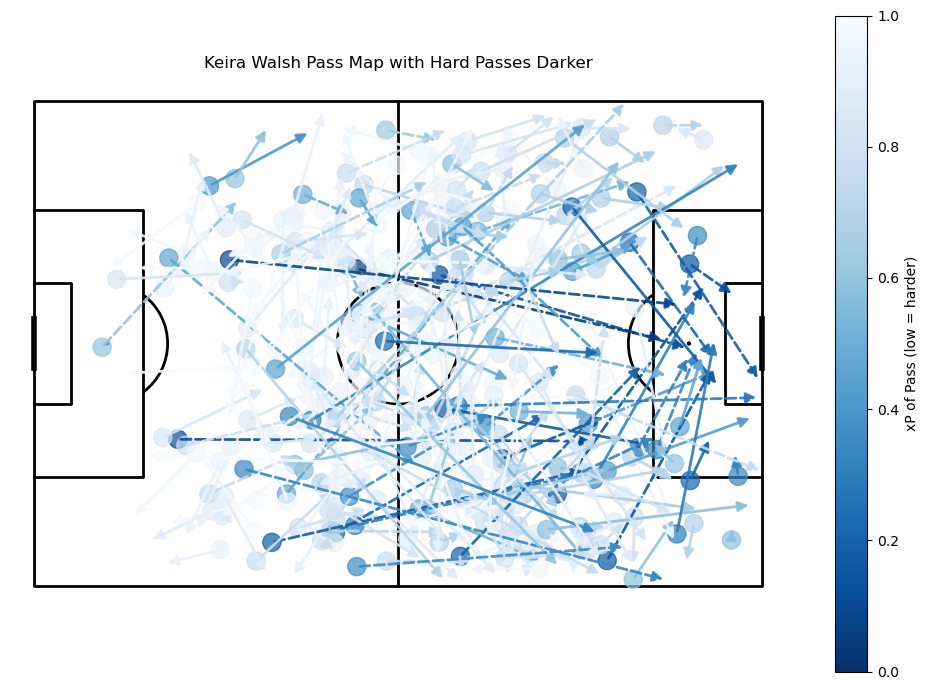

In [9]:
cmap = plt.cm.Blues_r  # reversed: low xP = dark, high xP = light

fig, ax = pitch.draw(figsize=(10, 7))

for _, p in passes.iterrows():
    x_start, y_start = p['start_x'], p['start_y']
    x_end, y_end = p['end_x'], p['end_y']
    
    color = cmap(p['xP'])
    linestyle = '-' if p['completed'] else '--'
    
    ax.add_patch(plt.Circle((x_start, y_start), radius=1.5, color=color, alpha=0.7, zorder=1))
    
    arrow = FancyArrowPatch((x_start, y_start), (x_end, y_end),
                            color=color, arrowstyle='-|>', linewidth=2,
                            alpha=0.9, mutation_scale=15, linestyle=linestyle, zorder=2)
    ax.add_patch(arrow)

sm = ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=ax, label='xP of Pass (low = harder)')

ax.set_title(f"{player_name} Pass Map with Hard Passes Darker")
plt.show()

## Step 9: Position-based Color Gradients

In [10]:
# Get player position
player_row = player_stats_euros[player_stats_euros['player'] == player_name]
player_position = player_row['primary_main_position'].dropna().iloc[0].strip().title()

# Color palettes
position_palette = {'Goalkeeper': 'royalblue', 'Defender': 'limegreen', 'Midfielder': '#d18f00', 'Forward': 'orangered'}
light_shade_dict = {'Goalkeeper': to_rgb('#7ec8ff'), 'Defender': to_rgb('#7dff7d'), 'Midfielder': to_rgb('#ffd34d'), 'Forward': to_rgb('#ff9a76')}

base_color = position_palette.get(player_position, 'grey')
rgb = to_rgb(base_color)
light_rgb = light_shade_dict.get(player_position, tuple(min(c * 1.2, 0.95) for c in rgb))
dark_rgb = tuple(c * 0.5 for c in rgb)

position_cmap = LinearSegmentedColormap.from_list(f"{player_position}_gradient", [dark_rgb, light_rgb])

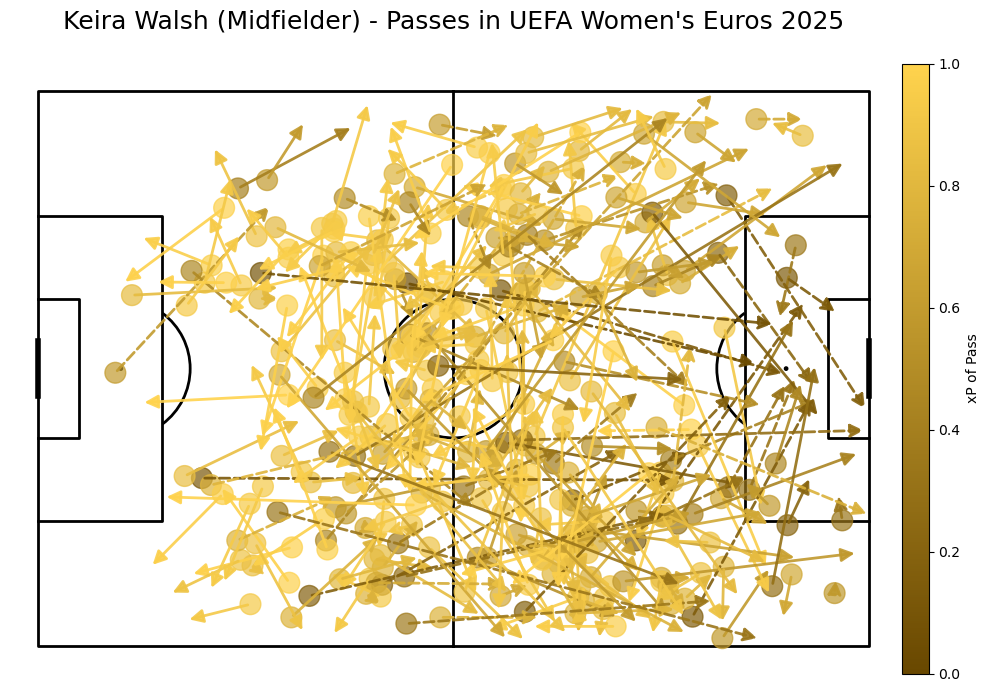

In [11]:
# Plot Passes with Position Gradient

# Filter player passes
passes = euros_2025[(euros_2025['player'] == player_name) & 
                     euros_2025['type'].str.contains('Pass', na=False)].dropna(subset=['start_x','start_y','end_x','end_y','xP','completed'])

fig, ax = pitch.draw(figsize=(10,7))

for _, thepass in passes.iterrows():
    x, y = thepass['start_x'], thepass['start_y']
    dx, dy = thepass['end_x'] - x, thepass['end_y'] - y
    color = position_cmap(thepass['xP'])
    linestyle = '-' if thepass['completed'] else '--'
    
    ax.add_patch(plt.Circle((x, y), radius=1.5, color=color, alpha=0.7, zorder=1))
    arrow = FancyArrowPatch((x, y), (x+dx, y+dy), color=color, arrowstyle='-|>', linewidth=2,
                            alpha=0.9, mutation_scale=20, linestyle=linestyle, zorder=2)
    ax.add_patch(arrow)

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = ScalarMappable(cmap=position_cmap, norm=Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, cax=cax, label='xP of Pass')

ax.set_title(f"{player_name} ({player_position}) - Passes in UEFA Women's Euros 2025", fontsize=18, pad=25)
plt.show()

## Step 10: Player Pass Map Function

In [12]:
def plot_player_pass_map(player_name, dataset, player_stats, competition_label):
    player_row = player_stats[player_stats['player'] == player_name]
    if player_row.empty:
        print(f"{player_name} not found in stats")
        return
    player_position = player_row['primary_main_position'].dropna().iloc[0].strip().title()
    
    position_palette = {'Goalkeeper':'royalblue', 'Defender':'limegreen', 'Midfielder':'#d18f00', 'Forward':'orangered'}
    light_shade_dict = {'Goalkeeper':to_rgb('#7ec8ff'),'Defender':to_rgb('#7dff7d'),'Midfielder':to_rgb('#ffd34d'),'Forward':to_rgb('#ff9a76')}
    
    base_color = position_palette.get(player_position, 'grey')
    rgb = to_rgb(base_color)
    light_rgb = light_shade_dict.get(player_position, (0.8,0.8,0.8))
    dark_rgb = tuple(c*0.5 for c in rgb)
    
    position_cmap = LinearSegmentedColormap.from_list(f"{player_position}_gradient",[dark_rgb, light_rgb])
    norm = Normalize(vmin=0, vmax=1)
    
    passes = dataset[(dataset['player']==player_name) & dataset['type'].str.contains('Pass', na=False)].dropna(subset=['start_x','start_y','end_x','end_y','xP','completed'])
    if passes.empty:
        print(f"No passes found for {player_name}")
        return
    
    pitch = Pitch(line_color="black")
    fig, ax = pitch.draw(figsize=(10,7))
    
    for _, thepass in passes.iterrows():
        x, y = thepass['start_x'], thepass['start_y']
        dx, dy = thepass['end_x']-x, thepass['end_y']-y
        color = position_cmap(norm(thepass['xP']))
        ax.add_patch(plt.Circle((x,y),1.5,color=color,alpha=0.7))
        arrow = FancyArrowPatch((x,y),(x+dx,y+dy), color=color, arrowstyle='-|>', linewidth=2,
                                alpha=0.9, mutation_scale=20, linestyle='--' if not thepass['completed'] else '-')
        ax.add_patch(arrow)
    
    ax.set_title(f"{player_name} ({player_position}) - Passes in {competition_label}", fontsize=18, pad=25)
    
    # Colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    sm = ScalarMappable(cmap=position_cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, cax=cax, label='xP of Pass')
    
    plt.show()

## Step 11: Loop Over Multiple Players

Plotting Alessia Russo...


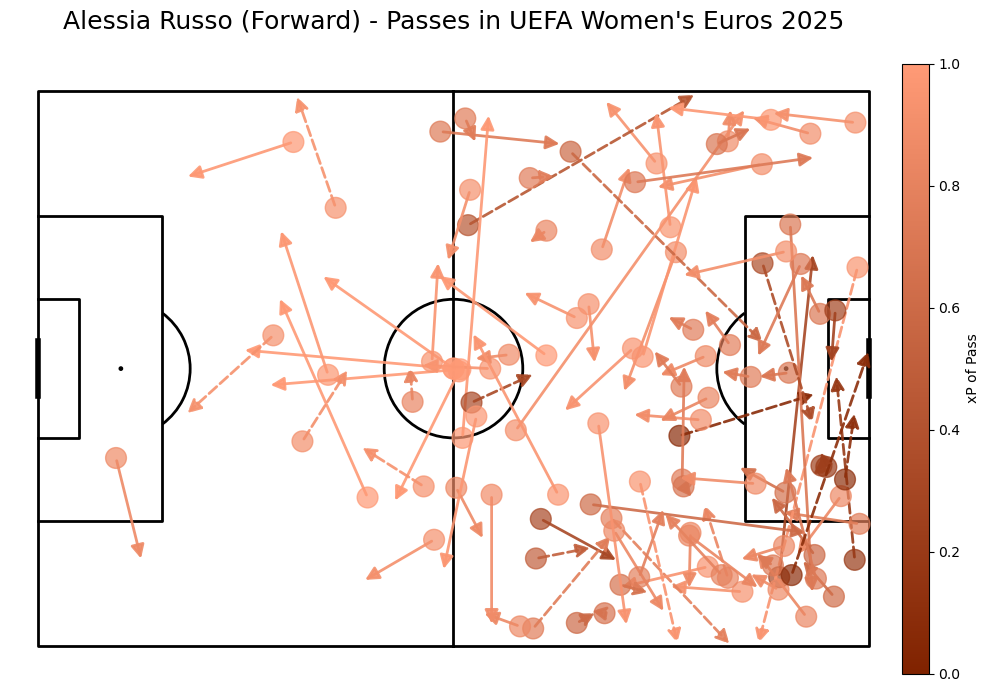

Plotting Ella Toone...


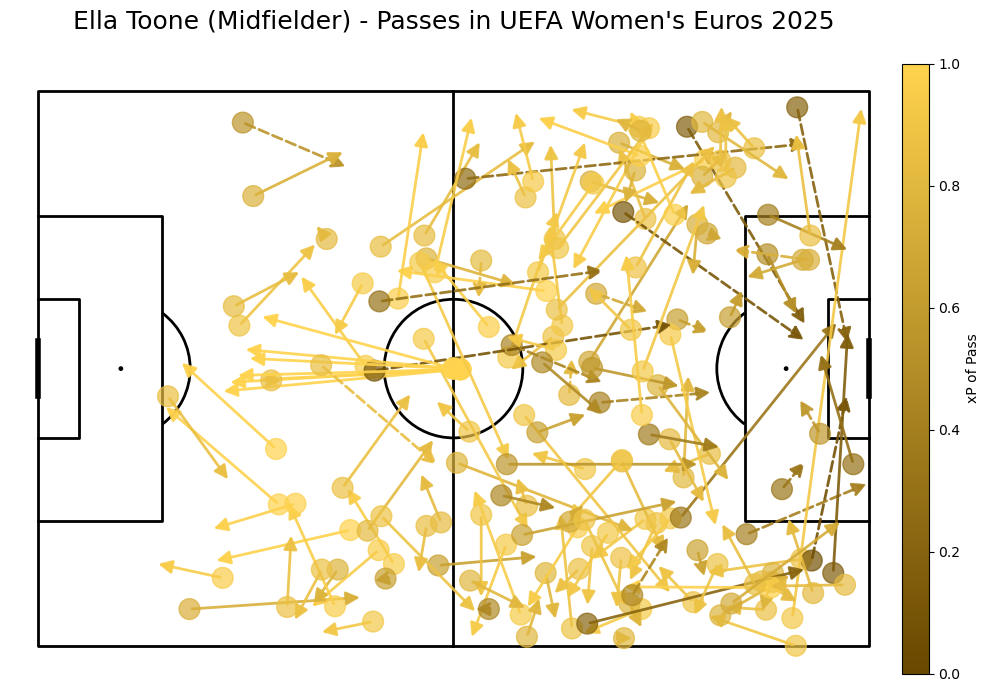

Plotting Keira Walsh...


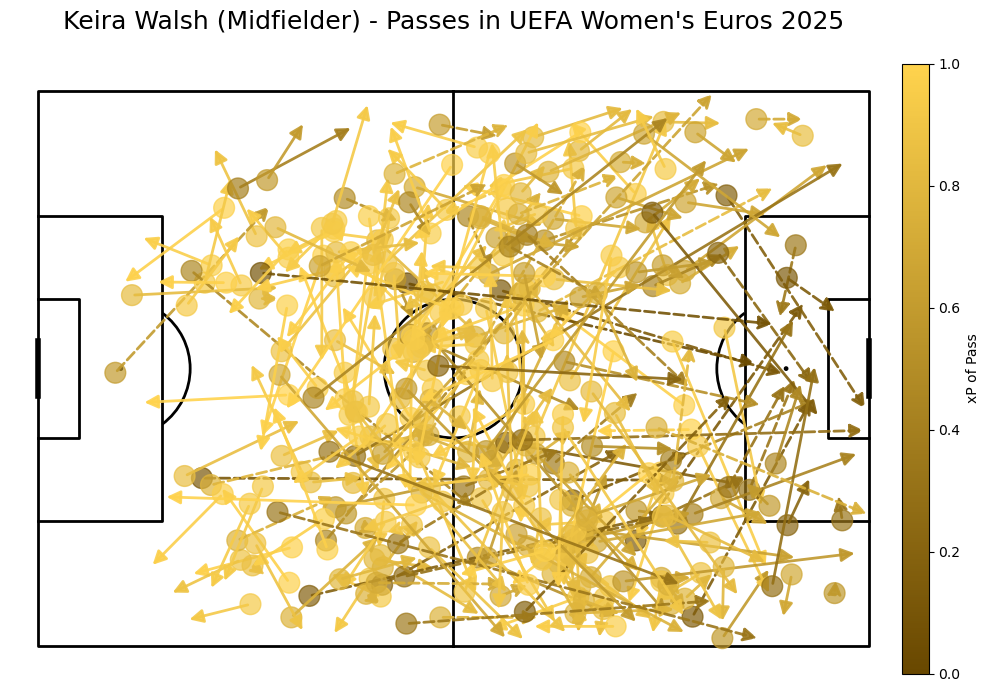

Plotting Hannah Hampton...


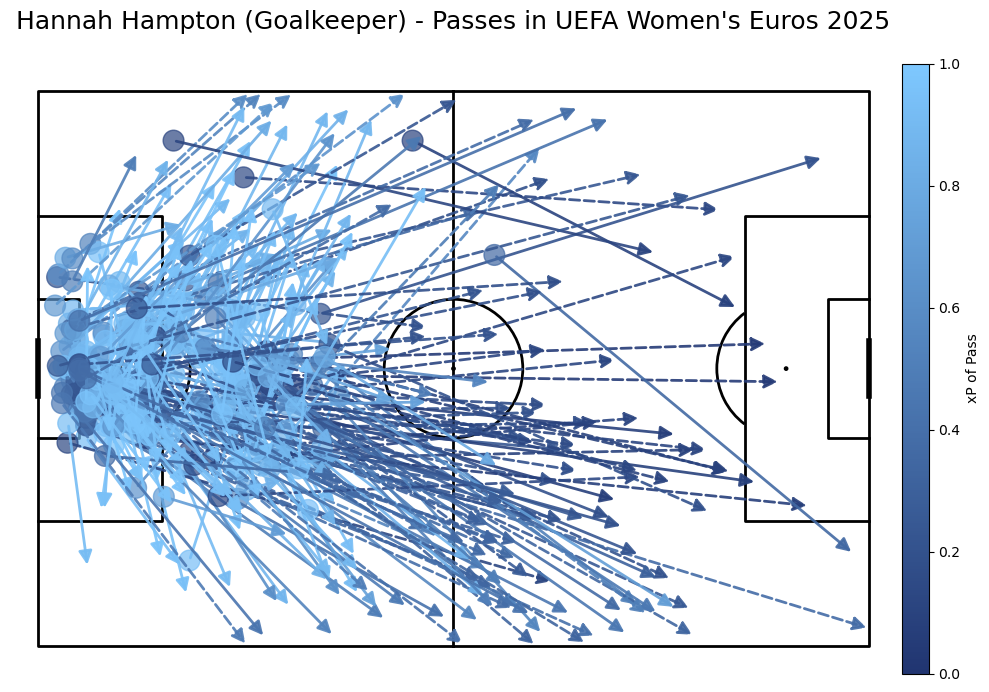

In [13]:
def plot_multiple_players(players, competition="euros"):
    if competition.lower() == "euros":
        dataset = euros_2025
        stats = player_stats_euros
        label = "UEFA Women's Euros 2025"
    elif competition.lower() == "worldcup":
        dataset = worldcup_all
        stats = player_stats_worldcup
        label = "FIFA Women's World Cups 2023"
    else:
        raise ValueError("competition must be 'euros' or 'worldcup'")
    
    for player in players:
        print(f"Plotting {player}...")
        plot_player_pass_map(player, dataset, stats, label)

players_to_plot = ['Alessia Russo','Ella Toone','Keira Walsh','Hannah Hampton']
plot_multiple_players(players_to_plot, competition="euros")